In [1]:
#%matplotlib inline
import numpy as np
import pandas as pd
import seaborn; seaborn.set()
from pmdarima import auto_arima
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import matplotlib.pylab as plt

In [2]:
bitcoin_df = pd.read_csv('Resources/BTC-USD.csv')
bitcoin_df.head(5)

,Type,Date,Open,High,Low,Close,Adj Close,Volume
0,BTC,12/2/2016,757.544983,781.296021,757.544983,777.943970,777.943970,127605000.0
1,BTC,12/3/2016,778.247986,778.247986,764.856018,771.155029,771.155029,69547296.0
2,BTC,12/4/2016,771.638000,773.872009,768.161011,773.872009,773.872009,60557900.0
3,BTC,12/5/2016,773.393982,773.468018,751.713013,758.700012,758.700012,106363000.0
4,BTC,12/6/2016,758.719971,765.622009,758.719971,764.223999,764.223999,116218000.0


In [3]:
bitcoin_df.dtypes

Type          object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [4]:
del bitcoin_df['Volume']

In [5]:
bitcoin_df

,Type,Date,Open,High,Low,Close,Adj Close
0,BTC,12/2/2016,757.544983,781.296021,757.544983,777.943970,777.943970
1,BTC,12/3/2016,778.247986,778.247986,764.856018,771.155029,771.155029
2,BTC,12/4/2016,771.638000,773.872009,768.161011,773.872009,773.872009
3,BTC,12/5/2016,773.393982,773.468018,751.713013,758.700012,758.700012
4,BTC,12/6/2016,758.719971,765.622009,758.719971,764.223999,764.223999
...,...,...,...,...,...,...,...
1822,BTC,11/28/2021,54813.023440,57393.843750,53576.734380,57248.457030,57248.457030
1823,BTC,11/29/2021,57291.906250,58872.878910,56792.527340,57806.566410,57806.566410
1824,BTC,11/30/2021,57830.113280,59113.402340,56057.281250,57005.425780,57005.425780
1825,BTC,12/1/2021,56907.964840,59041.683590,56553.082030,57229.828130,57229.828130


In [6]:
del bitcoin_df["Adj Close"]
bitcoin_df

,Type,Date,Open,High,Low,Close
0,BTC,12/2/2016,757.544983,781.296021,757.544983,777.943970
1,BTC,12/3/2016,778.247986,778.247986,764.856018,771.155029
2,BTC,12/4/2016,771.638000,773.872009,768.161011,773.872009
3,BTC,12/5/2016,773.393982,773.468018,751.713013,758.700012
4,BTC,12/6/2016,758.719971,765.622009,758.719971,764.223999
...,...,...,...,...,...,...
1822,BTC,11/28/2021,54813.023440,57393.843750,53576.734380,57248.457030
1823,BTC,11/29/2021,57291.906250,58872.878910,56792.527340,57806.566410
1824,BTC,11/30/2021,57830.113280,59113.402340,56057.281250,57005.425780
1825,BTC,12/1/2021,56907.964840,59041.683590,56553.082030,57229.828130


In [7]:
bitcoin2_df = bitcoin_df.dropna(axis=0, how="any")

In [8]:
bitcoin2_df

,Type,Date,Open,High,Low,Close
0,BTC,12/2/2016,757.544983,781.296021,757.544983,777.943970
1,BTC,12/3/2016,778.247986,778.247986,764.856018,771.155029
2,BTC,12/4/2016,771.638000,773.872009,768.161011,773.872009
3,BTC,12/5/2016,773.393982,773.468018,751.713013,758.700012
4,BTC,12/6/2016,758.719971,765.622009,758.719971,764.223999
...,...,...,...,...,...,...
1822,BTC,11/28/2021,54813.023440,57393.843750,53576.734380,57248.457030
1823,BTC,11/29/2021,57291.906250,58872.878910,56792.527340,57806.566410
1824,BTC,11/30/2021,57830.113280,59113.402340,56057.281250,57005.425780
1825,BTC,12/1/2021,56907.964840,59041.683590,56553.082030,57229.828130


In [9]:
bitcoin2_df.sort_index(inplace=True)

In [10]:
bitcoin2_df['Date'] = pd.to_datetime(bitcoin2_df['Date'])

/Users/daniellamayoral/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
bitcoin2_df.head(5)

,Type,Date,Open,High,Low,Close
0,BTC,2016-12-02,757.544983,781.296021,757.544983,777.943970
1,BTC,2016-12-03,778.247986,778.247986,764.856018,771.155029
2,BTC,2016-12-04,771.638000,773.872009,768.161011,773.872009
3,BTC,2016-12-05,773.393982,773.468018,751.713013,758.700012
4,BTC,2016-12-06,758.719971,765.622009,758.719971,764.223999


In [12]:
bitcoin2_df.set_index('Date')

,Type,Open,High,Low,Close
Date,,,,,
2016-12-02,BTC,757.544983,781.296021,757.544983,777.943970
2016-12-03,BTC,778.247986,778.247986,764.856018,771.155029
2016-12-04,BTC,771.638000,773.872009,768.161011,773.872009
2016-12-05,BTC,773.393982,773.468018,751.713013,758.700012
2016-12-06,BTC,758.719971,765.622009,758.719971,764.223999
...,...,...,...,...,...
2021-11-28,BTC,54813.023440,57393.843750,53576.734380,57248.457030
2021-11-29,BTC,57291.906250,58872.878910,56792.527340,57806.566410
2021-11-30,BTC,57830.113280,59113.402340,56057.281250,57005.425780


In [13]:
bitcoin3_df = bitcoin2_df.drop(columns=['Type','Open','High','Low'])

In [14]:
bitcoin3_df.set_index('Date')

,Close
Date,
2016-12-02,777.943970
2016-12-03,771.155029
2016-12-04,773.872009
2016-12-05,758.700012
2016-12-06,764.223999
...,...
2021-11-28,57248.457030
2021-11-29,57806.566410
2021-11-30,57005.425780


In [15]:
bitcoin3_df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [21]:
#help(seasonal_decompose)

In [17]:
#results = seasonal_decompose(bitcoin3_df['Close'],model ='multiplicative',period=365)
#plt.rcParams.update({'figure.figsize': (15,10)})
#results.plot()

In [18]:
#
results = seasonal_decompose(bitcoin3_df['Close'],model ='multiplicative',period=365)
observed = results.observed
seasonal = results.seasonal
residual = results.resid

df = pd.DataFrame({"observed":observed, "seasonal":seasonal,"residual":residual})
#df = pd.DataFrame({"observed":observed})

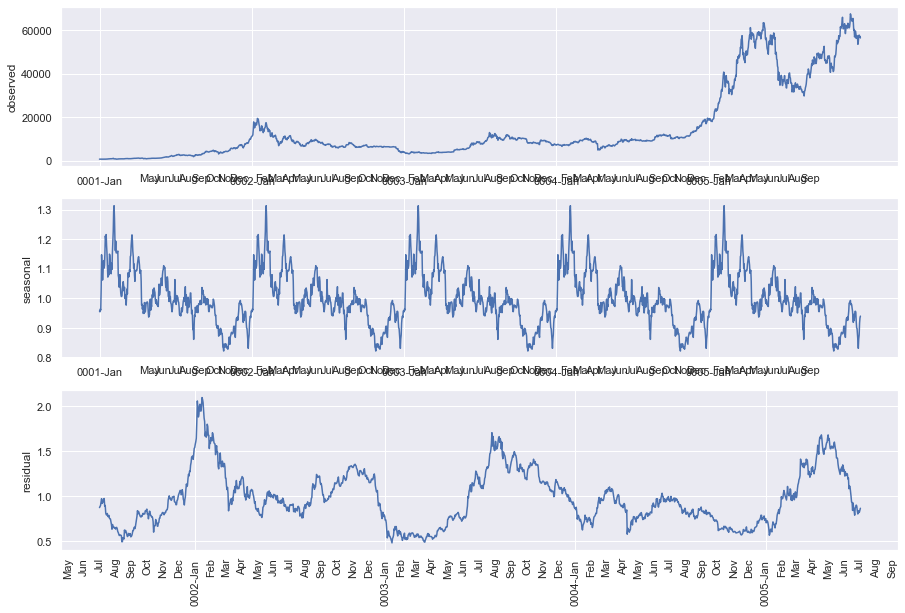

In [19]:
from matplotlib import dates as mdates
years = mdates.YearLocator()    # only print label for the years
months = mdates.MonthLocator()  # mark months as ticks
years_fmt = mdates.DateFormatter('%Y-%b')
fmt = mdates.DateFormatter('%b')

_, axes = plt.subplots(nrows=3,ncols=1, figsize=(15, 10))
for i, ax in enumerate(axes):
    ax = df.iloc[:,i].plot(ax=ax)
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)
    ax.xaxis.set_minor_locator(months)
    ax.xaxis.set_minor_formatter(fmt)
    ax.set_ylabel(df.iloc[:,i].name)
    plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

In [22]:
#Arima
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(bitcoin3_df['Close'], start_p = 1, start_q = 1,
max_p = 3, max_q = 3, m = 12,
start_P = 0, seasonal = True,
d = None, D = 1, trace = True,
error_action ='ignore', # we don't want to know if an order does not work
suppress_warnings = True, # we don't want convergence warnings
stepwise = True)# set to stepwise

# To print the summary
stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=5.23 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=34370.553, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=30443.018, Time=3.19 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=32785.669, Time=2.10 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=34392.787, Time=0.07 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=31083.706, Time=0.22 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=30292.906, Time=9.42 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=11.30 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=4.88 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=34360.748, Time=1.53 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=6.61 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=30293.316, Time=7.53 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=32756.305, Time=4.92 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=30294.982, Time=11.93 sec
 ARIMA(1,0,0)(2,1,0)[12]   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1823
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood              -15141.809
Date:                            Tue, 07 Dec 2021   AIC                          30291.618
Time:                                    22:08:02   BIC                          30313.624
Sample:                                         0   HQIC                         30299.739
                                           - 1823                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9690      0.003    344.320      0.000       0.963       0.974
ar.S.L12      -0.7281      0.011    -66.288      0.000      -0.750      -0.707
ar.S.L24      -0.2933      0.012    -24.003      0.000      -0.317      -0.269
sigma2      1.069e+06   1.29e+04     82.866      0.000    1.04e+06    1.09e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.61   Jarque-Bera (JB):             14125.66
Prob(Q):                              0.20   Prob(JB):                         0.00
Heteroskedasticity (H):              11.14   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
help(auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`` [3].


In [26]:
# Split data into train / test sets
train = bitcoin3_df.iloc[:len(bitcoin3_df)-12]
test = bitcoin3_df.iloc[len(bitcoin3_df)-12:] # set one year(12 months) for testing

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Close'],
order = (0, 1, 1),
seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 1811
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood              -14769.362
Date:                            Tue, 07 Dec 2021   AIC                          29548.725
Time:                                    22:13:34   BIC                          29576.197
Sample:                                         0   HQIC                         29558.866
                                           - 1811                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0272      0.013     -2.072      0.038      -0.053      -0.001
ar.S.L12      -0.0892      0.011     -8.086      0.000      -0.111      -0.068
ar.S.L24       0.0467      0.011      4.405      0.000       0.026       0.068
ma.S.L12      -0.9998      0.012    -81.699      0.000      -1.024      -0.976
sigma2      7.754e+05   1.59e-08   4.89e+13      0.000    7.75e+05    7.75e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             14687.79
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              11.27   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.36e+27. Standard errors may be unstable.
"""

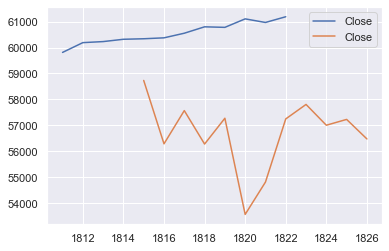

In [27]:
#Predictions of ARIMA Model agains the Test set
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,typ = 'levels').rename("Close")

# plot predictions and actual values
predictions.plot(legend = True)
test['Close'].plot(legend = True)


In [29]:
#Evaluate the model using MSE and RMSE
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test["Close"], predictions)

4108.626212509782

In [30]:
# Calculate mean squared error
mean_squared_error(test["Close"], predictions)

16880809.354122475

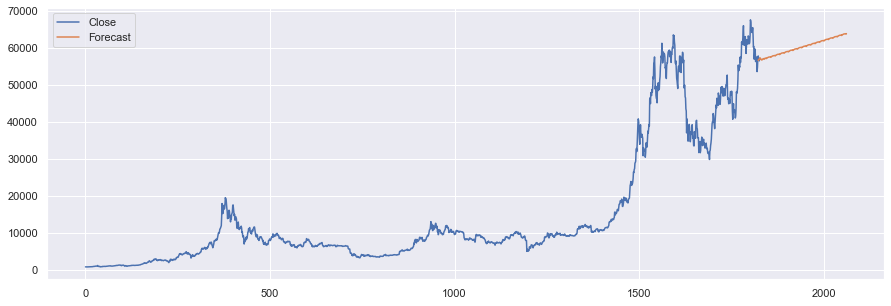

In [37]:
# Train the model on the full dataset
model = model = SARIMAX(bitcoin3_df['Close'],order = (0, 1, 1),seasonal_order =(2, 1, 1, 12))
result = model.fit()

# Forecast for the next 20 years
forecast = result.predict(start = len(bitcoin3_df),end = (len(bitcoin3_df)-1) + 20 * 12,typ = 'levels').rename('Forecast')

# Plot the forecast values
bitcoin3_df['Close'].plot(figsize = (15, 5), legend = True)
forecast.plot(legend = True)
